<a href="https://colab.research.google.com/github/Fecarvalho00/SVM_Kernels_e_PCA_com_-MNIST/blob/main/SVM_Kernels_e_PCA_com_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import keras

Importando a base de dados MNIST através da biblioteca Keras

In [27]:
from keras.datasets import mnist

Para a visualização usaremos apenas imagens de treino e podemos ver as imagens iniciais através da função abaixo:



In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
def plot_img(i):
  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

for i in range(5):
  plot_img(i)


Usaremos uma matriz para armazenar os dados de cada imagem em formato de vetor(array).
Neste Projeto utilizaremos os dígitos 3 e 4 para visualizar o kernel linear.

e os dígitos 4 e 5 para visualizar o kernel Poly e RBF.


In [29]:
num = 10000 #Número de Imagens a serem analisadas

k0, k1, k2 = 0, 0, 0
kmax = 50 # 50 de cada

dim = 28*28 #Dimensão das imagens analisadas

X3 = np.zeros((kmax, dim)) #Matriz para armazenar apenas o dígito 3
X4 = np.zeros((kmax, dim)) # Apenas o dígito 4
X5 = np.zeros((kmax, dim)) # Apenas o dígito 5

X = np.zeros((2*kmax, dim))

y = [] #Lista de rótulos
y3 = []
y4 = []
y5 = []

for i in range(num):
  if (y_train[i] == 3) and (k0 < kmax):
    b = X_train[i].reshape([1, dim])
    X3[k0,:] = b
    y3.append(3)
    k0 = k0 + 1

  elif (y_train[i] == 4) and (k1 < kmax):
    b = X_train[i].reshape([1,dim])
    X4[k1,:] = b
    y4.append(4)
    k1 = k1 + 1

  elif (y_train[i] == 5) and (k2 <kmax):
    b = X_train[i].reshape([1,dim])
    X5[k2,:] = b
    y5.append(5)
    k2 = k2 + 1

y[:kmax] = y3
y[kmax:] = y4
X[:kmax,:] = X3
X[kmax:,:] = X4


In [ ]:
print(np.shape(X))


(100, 784)


Aplicando o PCA para visualizar as imagens em $\mathbb{R}^2$.


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

In [31]:
#Salvando os dígitos 3 e 4
np.savetxt('X100_34.txt',X, newline='\n')
np.savetxt('y100_34.txt', y, newline ='\n')

X = np.loadtxt('X100_34.txt')
y = np.loadtxt('y100_34.txt')

<function matplotlib.pyplot.show(close=None, block=None)>

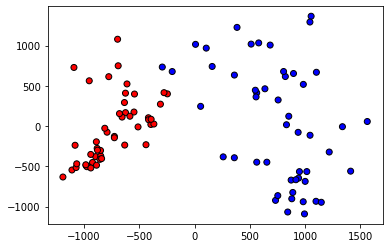

In [32]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'bwr', edgecolors = 'k')
plt.show

# Aplicando SVM Kernel linear

In [33]:
clf = svm.SVC(kernel = 'linear', C = 100)
clf.fit(X,y)

SVC(C=100, kernel='linear')

Hiperplano de separação


In [34]:
w = clf.coef_[0]
b = -w[0]/w[1]

xx = np.linspace(-1500,1500)
yy = b*xx - (clf.intercept_[0]) / w[1]


Margens do classificador
$$ \gamma = \dfrac{1}{\|w\|^2}$$

In [35]:
margem = 1 / np.sqrt(np.sum(clf.coef_**2)) 
yy_down = yy - np.sqrt(1 + b**2) * margem
yy_up = yy + np.sqrt(1 + b**2) * margem


Visualizando a reta


<ipython-input-36-caa8aadfa817>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr'),
<ipython-input-36-caa8aadfa817>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-36-caa8aadfa817>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(XX, YY, Z, cmap = cm.get_cmap('bwr'), alpha = 0.25


(array([-1500., -1000.,  -500.,     0.,   500.,  1000.,  1500.]),
 [Text(0, -1500.0, '−1500'),
  Text(0, -1000.0, '−1000'),
  Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500')])

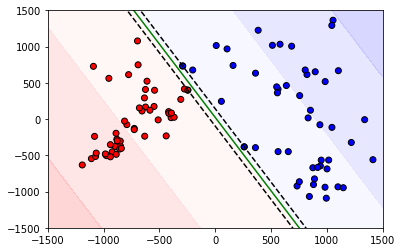

In [36]:
#Plot
plt.plot(xx, yy, 'g-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(
      clf.support_vectors_[:, 0],
      clf.support_vectors_[:, 1],
      facecolors="none",
      zorder=10,
      edgecolors="k",
      cmap=cm.get_cmap('bwr'),
  )
  
x_min = -1500
x_max = 1500
y_min = -1500
y_max = 1500

YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#Resultado em uma gráfico de contorno

plt.contourf(XX, YY, Z, cmap = cm.get_cmap('bwr'), alpha = 0.25
              ,linestyles = ['-'])
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'bwr', edgecolors = 'k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()

# Kernel Polinomial e RBF

Para utilizar o Kernel Polinomial e RBF utilizaremos os dígitos 4 e 5, assim podemos notar um comportamento não linear.


In [37]:
y = []
X = np.zeros((2*kmax, dim))

y[:kmax] = y4
y[kmax:] = y5

X[:kmax,:] = X4
X[kmax:,:] = X5


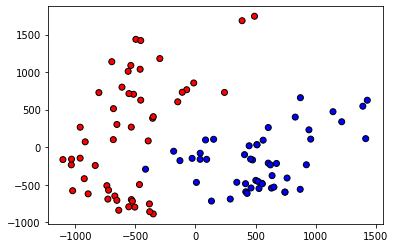

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr', edgecolors = 'k')

In [39]:
np.savetxt('X100_45.txt',X, newline='\n')
np.savetxt('y100_45.txt', y, newline ='\n')


In [40]:
X = np.loadtxt('X100_45.txt')
y = np.loadtxt('y100_45.txt')

Utilizar o kernel polinomial ou RBF refere-se à substituir a função $f(w,x) = \langle \mathbf{w}, x \rangle + b $ por uma função Kernel.

No caso da função polinomial será
$$ f(x,z) = (p(\mathbf(x,z))^d,$$ 
onde p(x,z) é um polinômio de grau d.


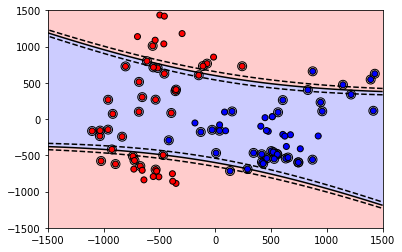

In [41]:
clf = svm.SVC(kernel= 'poly', degree = 2)
clf.fit(X, y)

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
    )
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'bwr', zorder = 10, edgecolors='k')

x_min = -1500
x_max = 1500
y_min = -1500
y_max = 1500

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap= 'bwr', alpha = 0.2)
plt.contour(
    XX,
    YY,
    Z,
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
    levels=[-0.2, 0, 0.2],
    )

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


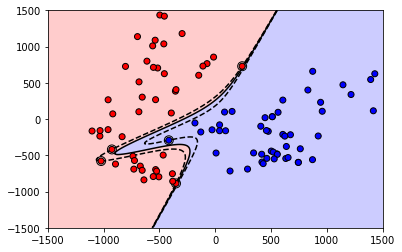

In [42]:
clf = svm.SVC(kernel= 'poly', gamma = 2, degree = 3)
clf.fit(X, y)

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
    )
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'bwr', zorder = 10, edgecolors='k')

x_min = -1500
x_max = 1500
y_min = -1500
y_max = 1500

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap= 'bwr', alpha = 0.2)
plt.contour(
    XX,
    YY,
    Z,
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
    levels=[-1, 0, 1],
    )

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


Já para a função RBF utilizaremos função

$$f(x,z) = e^\left(-\dfrac{\|x-z\|^2}{2 \sigma^2 }\right)$$

In [ ]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1.0, 'gamma': 1.0} with a score of 0.98


In [ ]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

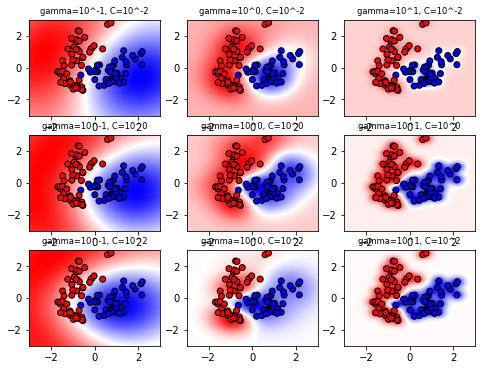

In [ ]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size='small')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap= 'bwr_r')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors="k")
    #plt.xticks(())
    #plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

